# Electric Vehicles Dataset

## Overview:
This dataset contains information on electric vehicles, including details such as vehicle make, model, type, electric range, eligibility for alternative fuel vehicle programs, and geographic and legislative data.

## Dataset Columns:

1. **VIN (1-10)**: The first 10 digits of the Vehicle Identification Number.
2. **County**: The county where the vehicle is registered.
3. **City**: The city where the vehicle is registered.
4. **State**: The state where the vehicle is registered.
5. **Postal Code**: The postal code of the vehicle registration.
6. **Model Year**: The year the vehicle was manufactured.
7. **Make**: The vehicle manufacturer (e.g., TOYOTA, CHEVROLET).
8. **Model**: The vehicle model (e.g., RAV4 PRIME, VOLT).
9. **Electric Vehicle Type**: Specifies whether the vehicle is a Plug-in Hybrid (PHEV) or Battery Electric Vehicle (BEV).
10. **Clean Alternative Fuel Vehicle (CAFV) Eligibility**: Indicates if the vehicle qualifies as a Clean Alternative Fuel Vehicle.
11. **Electric Range**: The distance the vehicle can travel using electric power alone (in miles).
12. **Base MSRP**: The base Manufacturer Suggested Retail Price of the vehicle.
13. **Legislative District**: The legislative district where the vehicle is registered.
14. **DOL Vehicle ID**: The Department of Licensing Vehicle ID.
15. **Vehicle Location**: The latitude and longitude of the vehicle’s location.
16. **Electric Utility**: The electric utility provider for the vehicle’s area.
17. **2020 Census Tract**: The census tract information based on 2020 data.

## Initial Analysis Plan:

- **Basic statistics and missing values**: Identify missing data and compute basic descriptive statistics.
- **Electric vehicle types and ranges**: Analyze the distribution and electric range of Plug-in Hybrid (PHEV) and Battery Electric Vehicles (BEV).
- **Distribution by manufacturer**: Investigate which manufacturers have the highest representation in the dataset.
- **Geographic distribution insights**: Examine the regional distribution of electric vehicles, including registration by county, city, state, and legislative district.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import datset csv

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Innometics lab/dataset.csv")

df.head()  # Print the first few rows of the dataset


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
# apply value count on the state AND PROVIDE ME SALES ALSO

state_counts = df['State'].value_counts()
print("Sales by State:")
print(state_counts)


Sales by State:
State
WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA         3
NJ         3
NH         2
OH         2
WY         2
ID         2
KY         1
RI         1
ME         1
MN         1
SD         1
WI         1
NM         1
AK         1
MS         1
AL         1
DE         1
OK         1
ND         1
Name: count, dtype: int64


In [6]:
df.shape

(112634, 17)

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

#Task 1: This is an open ended problem. Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset available above.


Univariate Analysis for Model Year:
count    112634.000000
mean       2019.003365
std           2.892364
min        1997.000000
25%        2017.000000
50%        2020.000000
75%        2022.000000
max        2023.000000
Name: Model Year, dtype: float64


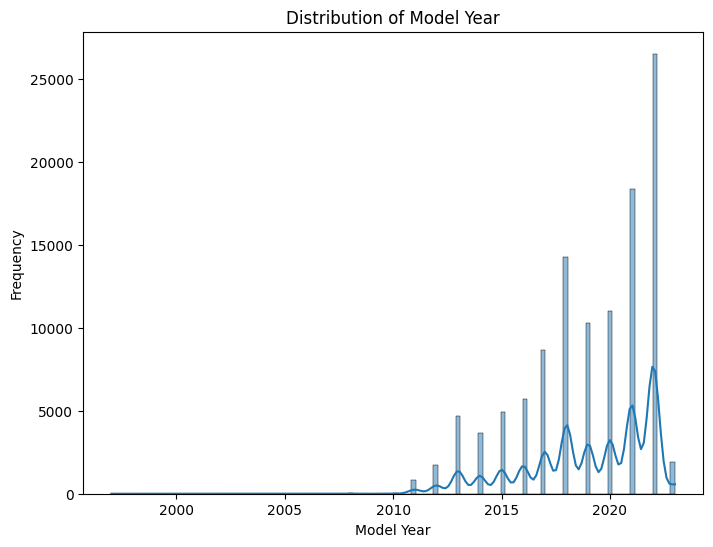


Univariate Analysis for Electric Range:
count    112634.000000
mean         87.812987
std         102.334216
min           0.000000
25%           0.000000
50%          32.000000
75%         208.000000
max         337.000000
Name: Electric Range, dtype: float64


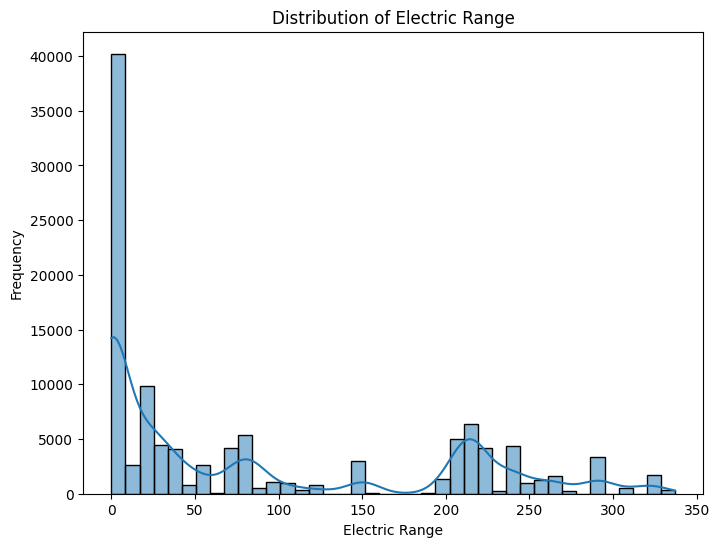


Univariate Analysis for Base MSRP:
count    112634.000000
mean       1793.439681
std       10783.753486
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64


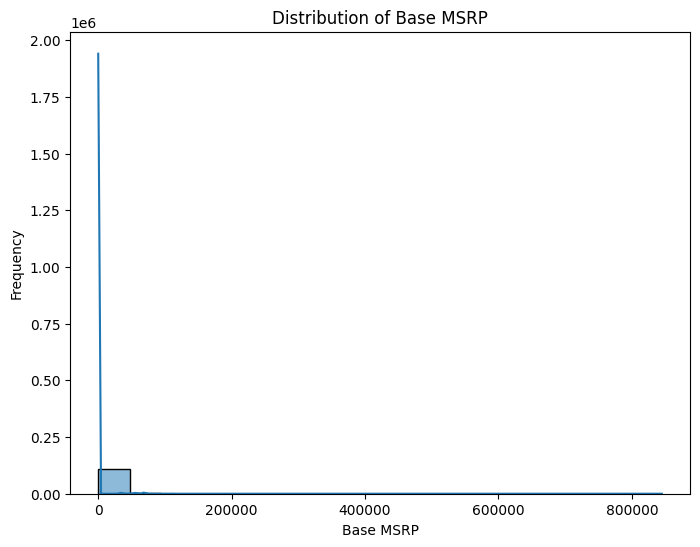

In [9]:
#univariate analysis on given dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numerical features
numerical_features = ['Model Year', 'Electric Range', 'Base MSRP']

for feature in numerical_features:
  print(f"\nUnivariate Analysis for {feature}:")
  print(df[feature].describe())

  plt.figure(figsize=(8, 6))
  sns.histplot(df[feature], kde=True)
  plt.title(f"Distribution of {feature}")
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.show()


Univariate Analysis for Make:
Make
TESLA             52078
NISSAN            12880
CHEVROLET         10182
FORD               5819
BMW                4680
KIA                4483
TOYOTA             4405
VOLKSWAGEN         2514
AUDI               2332
VOLVO              2288
CHRYSLER           1794
HYUNDAI            1412
JEEP               1152
RIVIAN              885
FIAT                822
PORSCHE             818
HONDA               792
MINI                632
MITSUBISHI          588
POLESTAR            558
MERCEDES-BENZ       506
SMART               273
JAGUAR              219
LINCOLN             168
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               20
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: count, dtype: int64


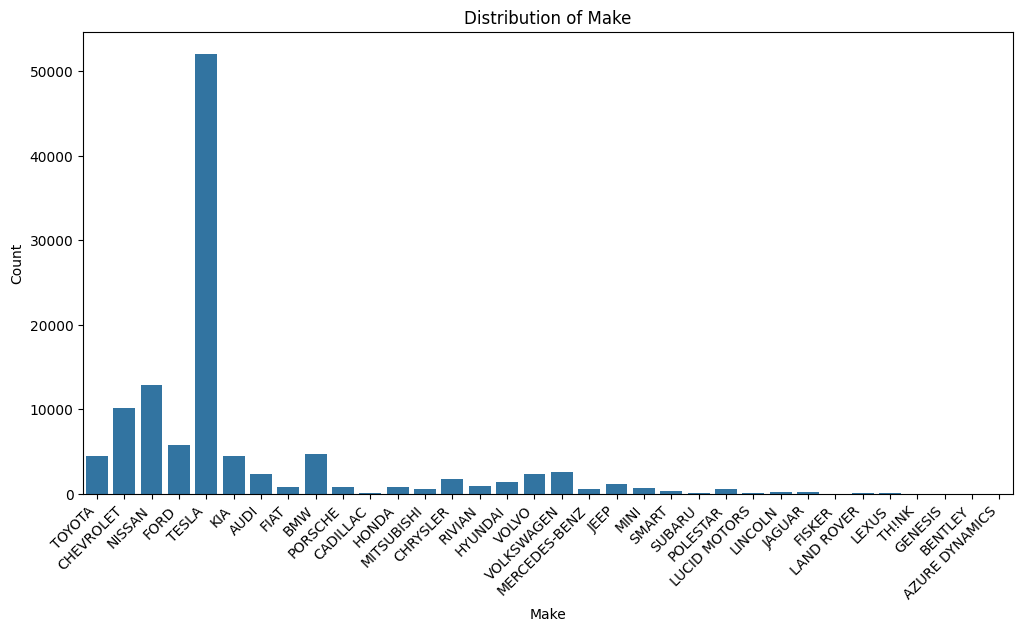


Univariate Analysis for Electric Vehicle Type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: count, dtype: int64


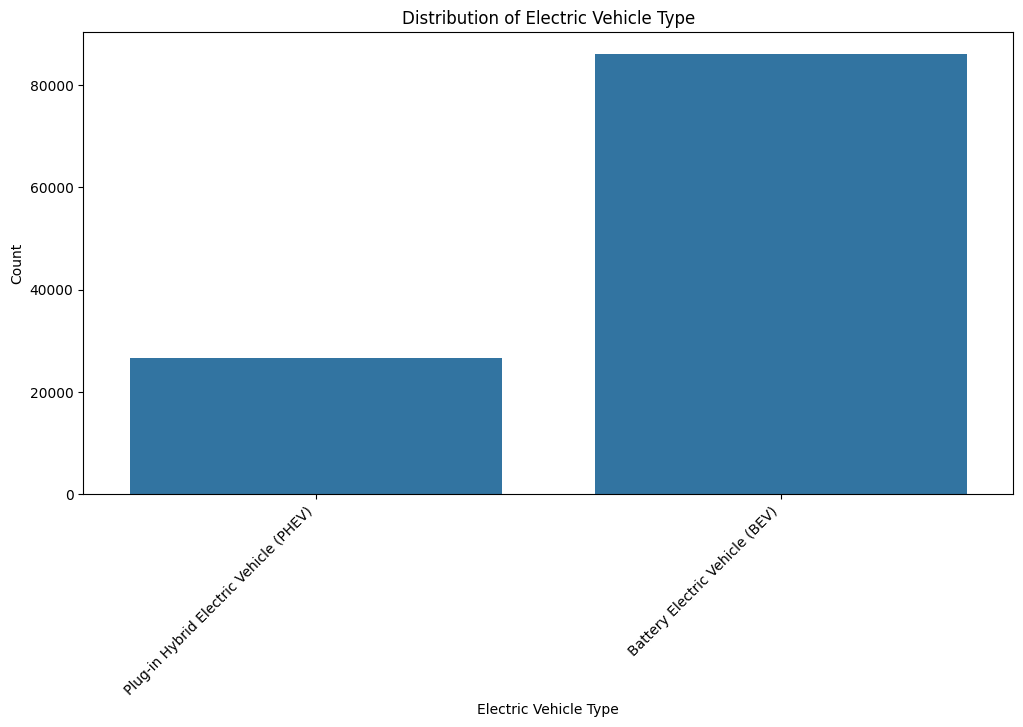


Univariate Analysis for Clean Alternative Fuel Vehicle (CAFV) Eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         58639
Eligibility unknown as battery range has not been researched    39236
Not eligible due to low battery range                           14759
Name: count, dtype: int64


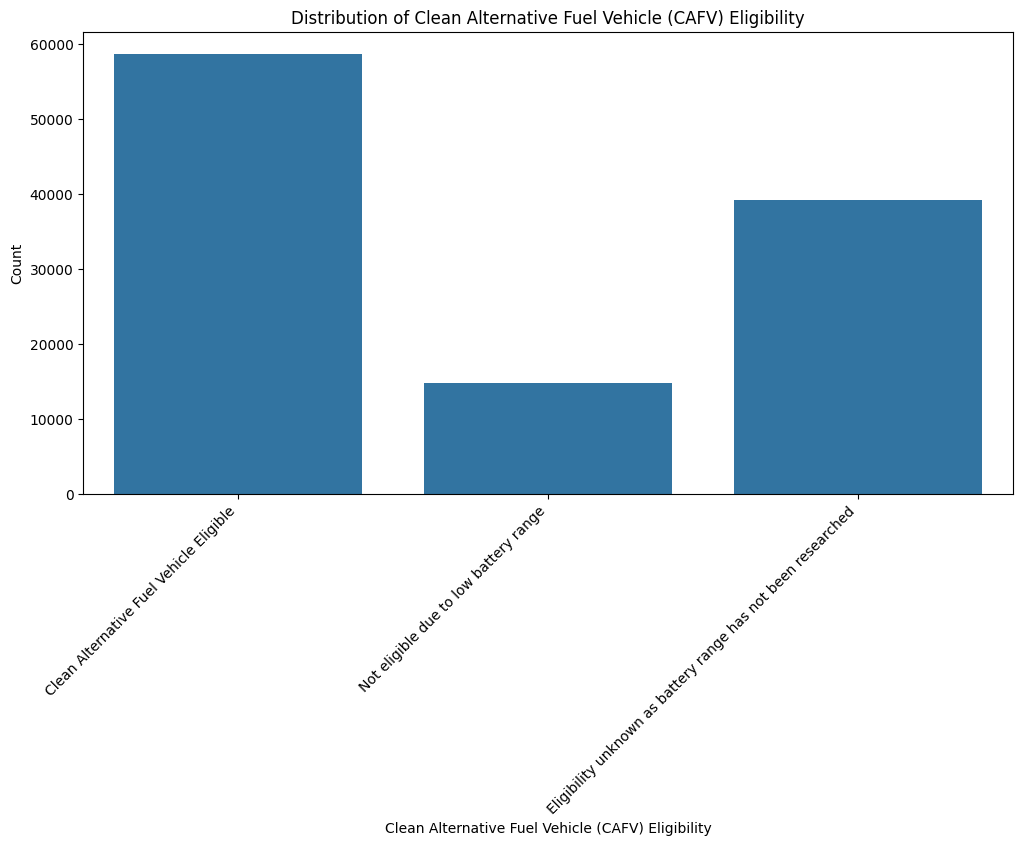


Univariate Analysis for State:
State
WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA         3
NJ         3
NH         2
OH         2
WY         2
ID         2
KY         1
RI         1
ME         1
MN         1
SD         1
WI         1
NM         1
AK         1
MS         1
AL         1
DE         1
OK         1
ND         1
Name: count, dtype: int64


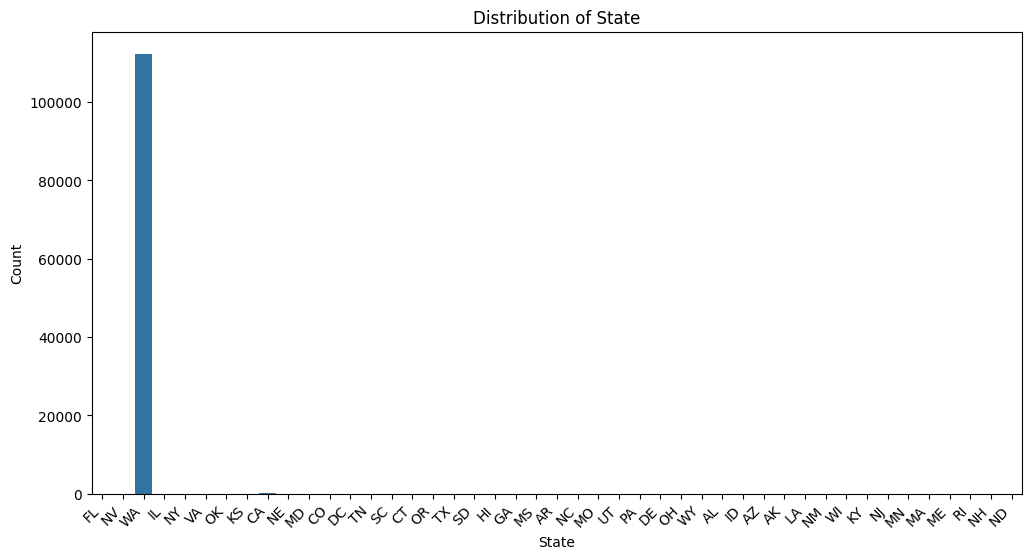

In [10]:
# Univariate analysis for categorical features
categorical_features = ['Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'State']

for feature in categorical_features:
  print(f"\nUnivariate Analysis for {feature}:")
  print(df[feature].value_counts())

  plt.figure(figsize=(12, 6))
  sns.countplot(x=feature, data=df)
  plt.title(f"Distribution of {feature}")

  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
  plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


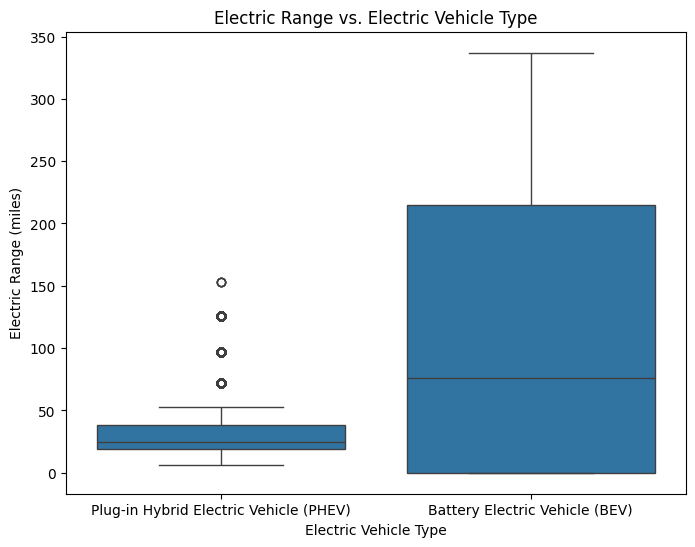

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


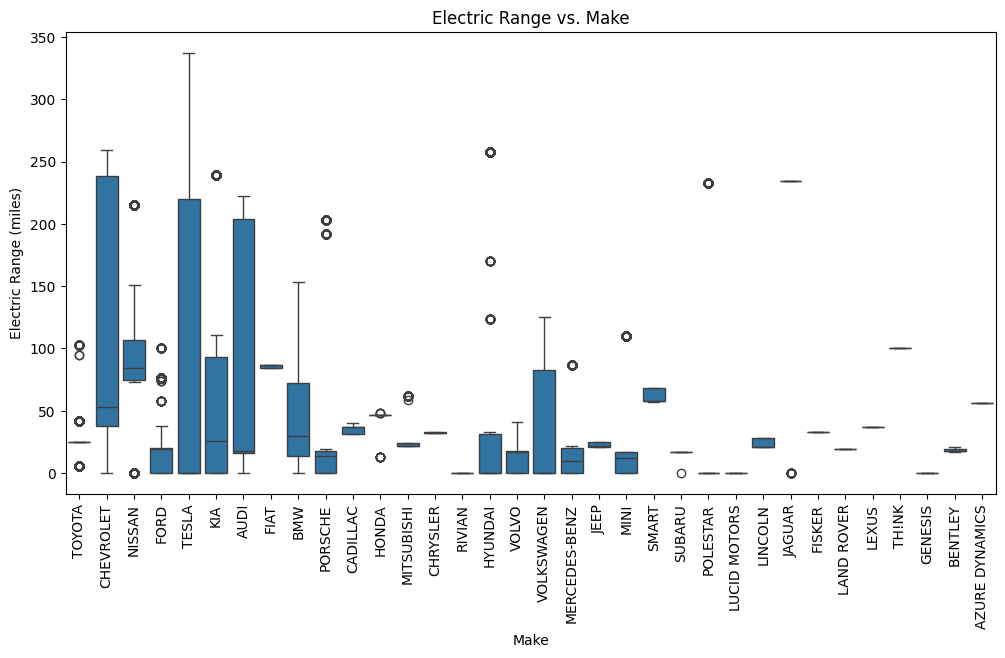

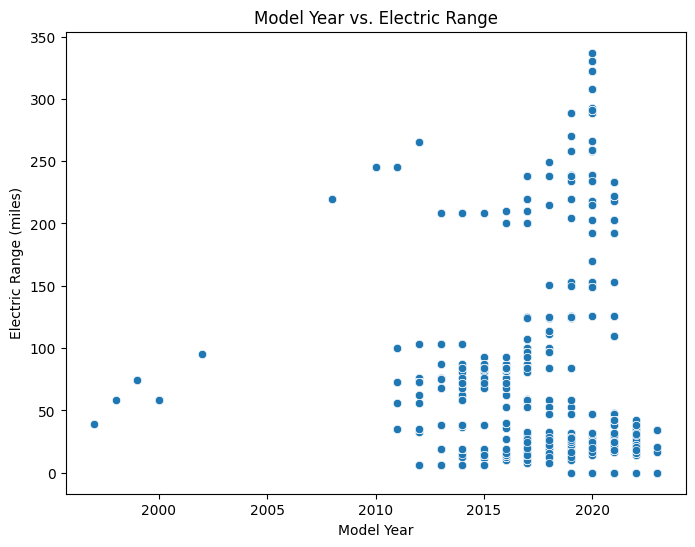

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


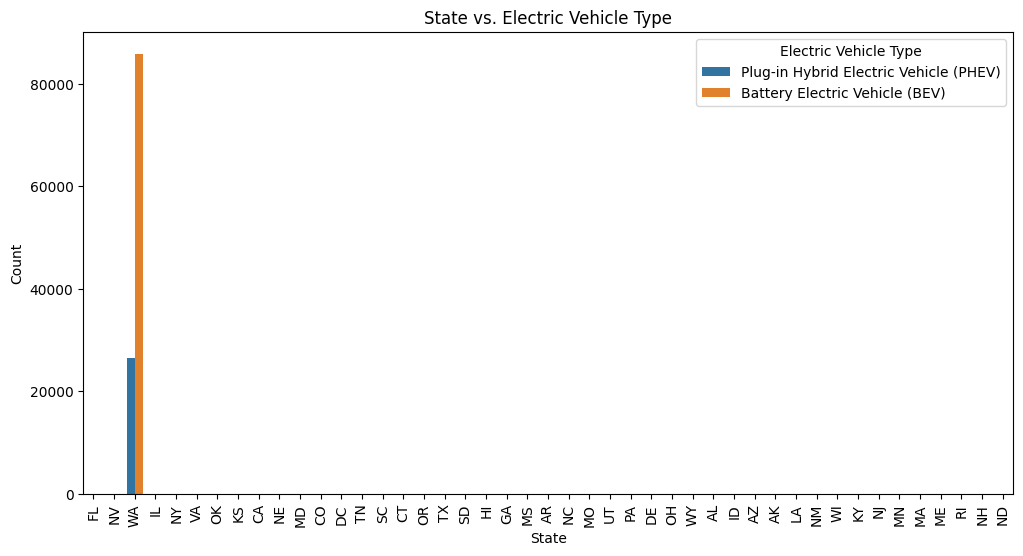

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


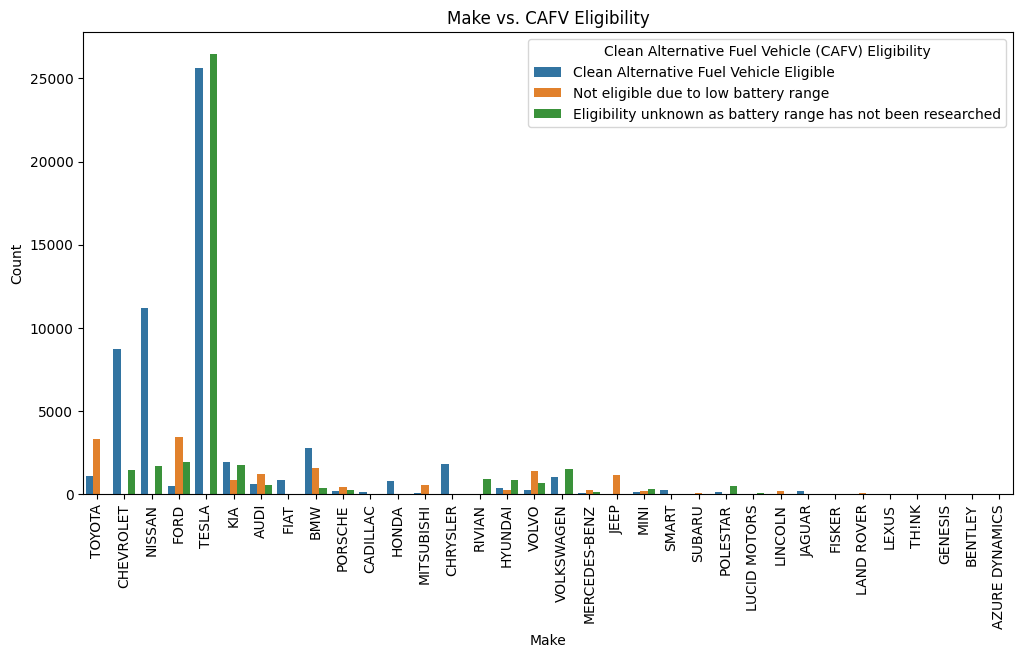

In [11]:
# performa bivariate analysis

import matplotlib.pyplot as plt
# Bivariate Analysis:

# 1. Electric Range vs. Electric Vehicle Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Range vs. Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.show()

# 2. Electric Range vs. Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Electric Range', data=df)
plt.title('Electric Range vs. Make')
plt.xlabel('Make')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=90)
plt.show()

# 3. Model Year vs. Electric Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=df)
plt.title('Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

# 4. State vs. Electric Vehicle Type
plt.figure(figsize=(12, 6))
sns.countplot(x='State', hue='Electric Vehicle Type', data=df)
plt.title('State vs. Electric Vehicle Type')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 5. Make vs. CAFV Eligibility
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=df)
plt.title('Make vs. CAFV Eligibility')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


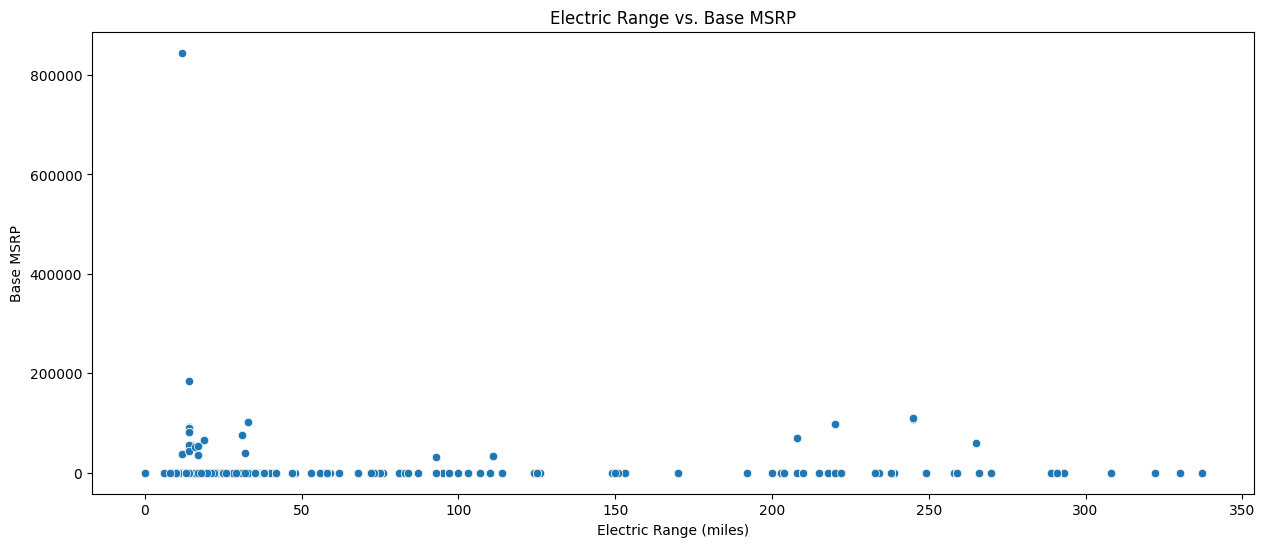

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

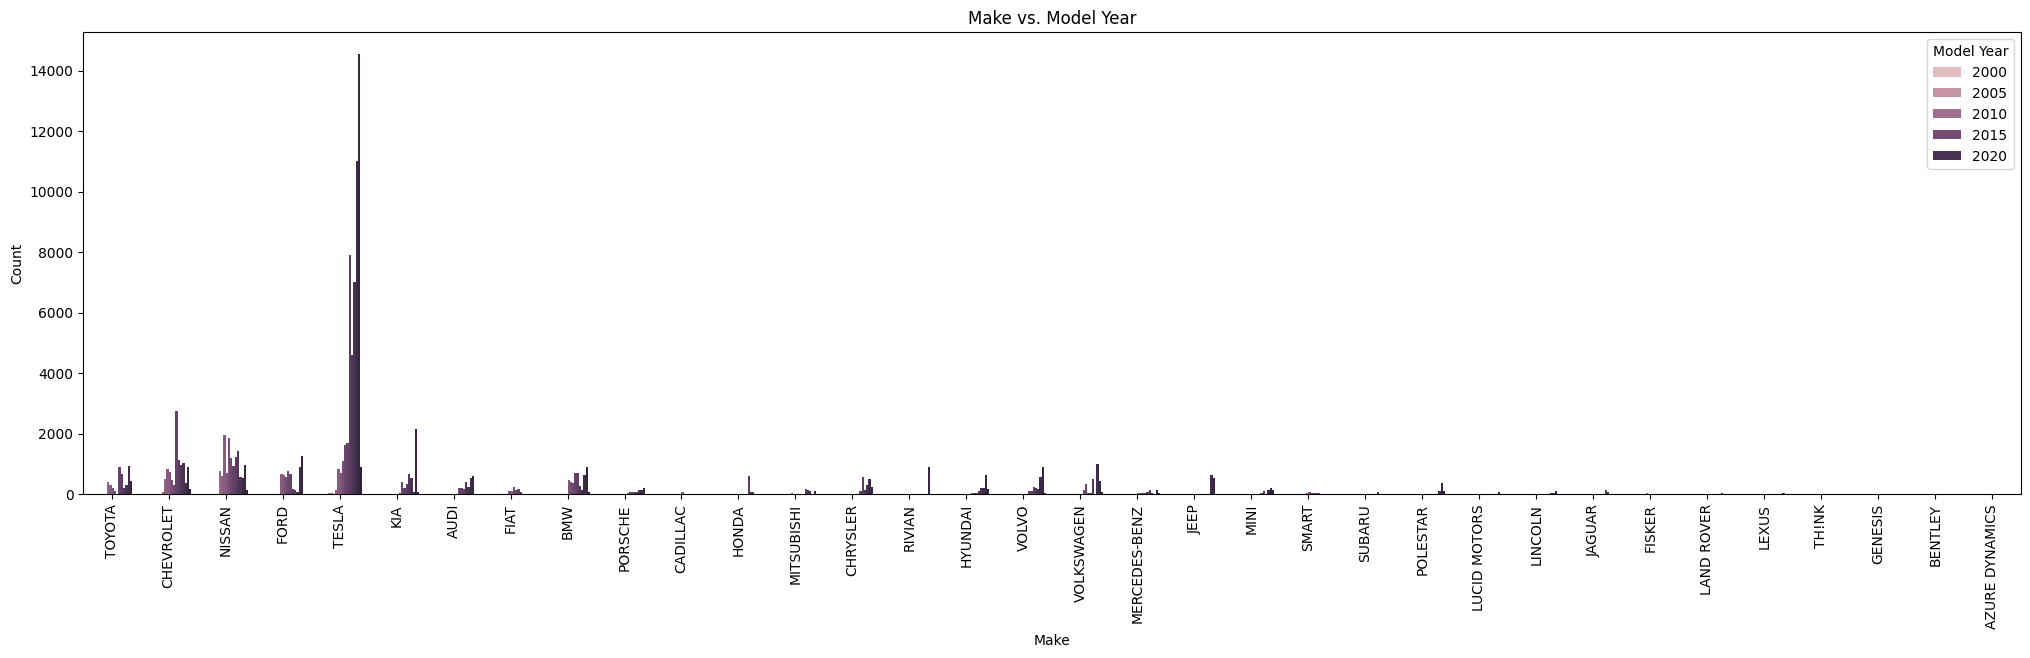

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


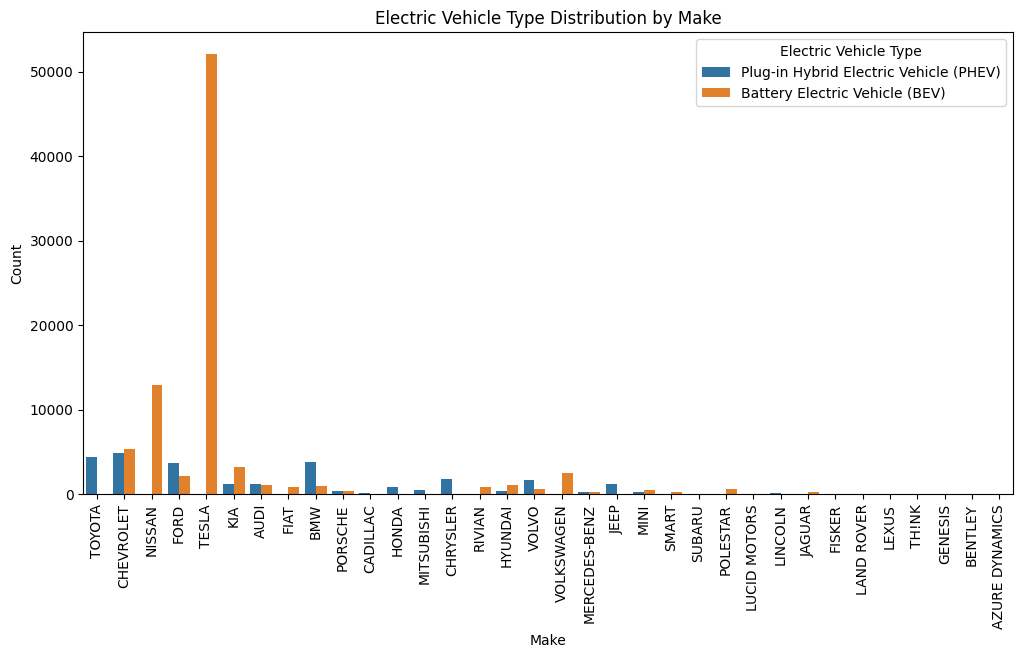

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


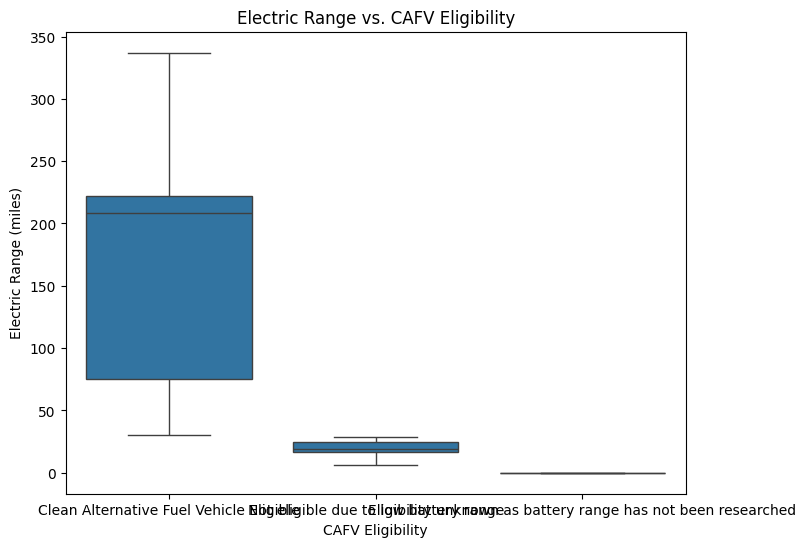

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


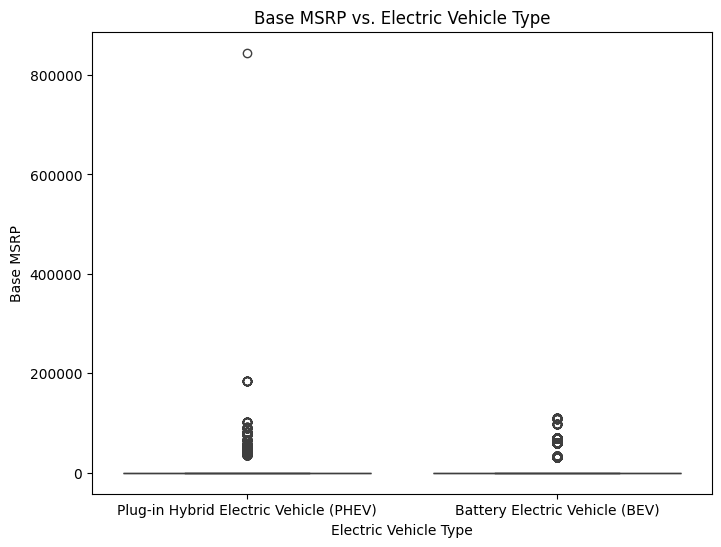

In [15]:
# analyze the relationship between:
# # - Electric Range and Base MSRP
# # - Electric Vehicle Type and State
# # - Make and Model Year


import matplotlib.pyplot as plt
# Analyze the relationship between Electric Range and Base MSRP
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP')
plt.show()


# Analyze the relationship between Make and Model Year
plt.figure(figsize=(25, 6))
sns.countplot(x='Make', hue='Model Year', data=df)
plt.title('Make vs. Model Year')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Analyze the relationship between Make and Electric Vehicle Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', hue='Electric Vehicle Type', data=df)
plt.title('Electric Vehicle Type Distribution by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Analyze the relationship between CAFV Eligibility and Electric Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=df)
plt.title('Electric Range vs. CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range (miles)')
plt.show()

# Analyze the relationship between Electric Vehicle Type and Base MSRP
plt.figure(figsize=(8, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.title('Base MSRP vs. Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP')
plt.show()


#Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [16]:
import plotly.express as px

In [17]:
# Aggregate the data by State (or you can use Postal Code for more granular data)

state_vehicle_count = df.groupby(['State']).size().reset_index(name='Vehicle Count')

# Create the Choropleth Plot using Plotly Express
fig = px.choropleth(state_vehicle_count,
                    locations='State',
                    locationmode='USA-states',  # Use 'USA-states' as the location mode for US states
                    color='Vehicle Count',  # Column that defines color intensity
                    hover_name='State',  # Hover shows the state name
                    title='Electric Vehicle Count by State',
                    color_continuous_scale="Viridis",  # Choose a color scale
                    scope="usa")  # Restrict to USA


fig.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Aggregate the data by State and Postal Code to count the number of electric vehicles
state_postal_vehicle_count = df.groupby(['State', 'Postal Code']).size().reset_index(name='Vehicle Count')

# Create a choropleth map using Plotly Express with pin code
fig = px.choropleth(state_postal_vehicle_count,
                    locations='State',
                    locationmode="USA-states",  # State-level mapping for USA
                    color='Vehicle Count',
                    color_continuous_scale='Blues',
                    scope="usa",  # Focus on USA map
                    labels={'Vehicle Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State and Postal Code in the USA')

# Add markers for each postal code with the vehicle count
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=3,
    mapbox_center={"lat": 37.0902, "lon": -95.7129}
)

# Add hover data to show postal code and vehicle count
fig.update_traces(
    hovertemplate="<b>State:</b> %{location}<br><b>Postal Code:</b> %{customdata[0]}<br><b>Vehicle Count:</b> %{z}<extra></extra>",
    customdata=state_postal_vehicle_count[['Postal Code']].values
)

# Show the map
fig.show()


#Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [19]:
import plotly.express as px
import pandas as pd

# Filter data for the last decade (2013-2023)
last_decade_data = df[df['Model Year'] >= 2013]

# Aggregate data by Model Year and Make to count the number of EV vehicles per make each year
year_make_sales = last_decade_data.groupby(['Model Year', 'Make']).size().reset_index(name='Vehicle Count')

# Create the Racing Bar Plot using Plotly Express
fig = px.bar(year_make_sales,
             x='Make',
             y='Vehicle Count',
             color='Make',
             animation_frame='Model Year',
             animation_group='Make',
             range_y=[0, year_make_sales['Vehicle Count'].max()],
             title='Year-wise Sales Trends of Each Maker from Last Decade (2013-2023)',
             labels={'Vehicle Count': 'Number of Vehicles Sold'},
             height=600)

# Customize the layout for better visualization
fig.update_layout(
    xaxis_title='Vehicle Make',
    yaxis_title='Number of Vehicles Sold',
    title_x=0.5  # Center the title
)

# Show the animated plot
fig.show()


In [24]:
# Filter data for the last decade (2013-2023)
last_decade_data = df[df['Model Year'] >= 2013]

# Aggregate data by Model Year and Make to count the number of EV vehicles per make each year
year_make_sales = last_decade_data.groupby(['Model Year', 'Make']).size().reset_index(name='Vehicle Count')

# Create the Racing Bar Plot using Plotly Express (Horizontal)
fig = px.bar(year_make_sales,
             y='Make',  # Use 'y' for horizontal orientation
             x='Vehicle Count',  # Use 'x' for horizontal orientation
             color='Make',
             animation_frame='Model Year',
             animation_group='Make',
             range_x=[0, year_make_sales['Vehicle Count'].max()],  # Adjust range for horizontal
             title='Year-wise Sales Trends of Each Maker from Last Decade (2013-2023) (Horizontal)',
             labels={'Vehicle Count': 'Number of Vehicles Sold'},
             height=600)

# Customize the layout for better visualization
fig.update_layout(
    yaxis_title='Vehicle Make',  # Change to yaxis_title
    xaxis_title='Number of Vehicles Sold',  # Change to xaxis_title
    title_x=0.5  # Center the title
)

# Show the animated plot
fig.show()


In [23]:
# convert this spped now intothe month by month

import pandas as pd


df['Month'] = pd.to_datetime(df['Model Year'], format='%Y').dt.month

# Group by Month and Make to count the number of EV vehicles per make each month
month_make_sales = df.groupby(['Month', 'Make']).size().reset_index(name='Vehicle Count')

# Create the Racing Bar Plot using Plotly Express
fig = px.bar(month_make_sales,
             x='Make',
             y='Vehicle Count',
             color='Make',
             animation_frame='Month',
             animation_group='Make',
             range_y=[0, month_make_sales['Vehicle Count'].max()],
             title='Month-wise Sales Trends of Each Maker',
             labels={'Vehicle Count': 'Number of Vehicles Sold'},
             height=600)

# Customize the layout for better visualization
fig.update_layout(
    xaxis_title='Vehicle Make',
    yaxis_title='Number of Vehicles Sold',
    title_x=0.5  # Center the title
)

# Show the animated plot
fig.show()
